`Albert Tadros
CSc_447
Final Project_ Audio Data Processing
'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy import signal
from IPython.display import Audio, Image
import librosa
import librosa.display
import pylab
from numpy.fft import fft, ifft
%matplotlib inline
import math
from PIL import Image, ImageDraw
import json

# Implementing and running the function that perfrorms the data processing

In [2]:
# Load the csv file of triads dataset to obtain the chordnames
triads = pd.read_csv("triads.csv")

# obtaining chord names and storing them in chords array
df = pd.DataFrame(triads)
df.shape
chords = df.iloc[:, :1].values

# defining path to the input audio files and a path to output file where processed data will be stored
wavfiles_Path = "/Users/atadros/Downloads/CSc447_Machine learning/Final Project/dataset/piano_triads/" # input
JSON_PATH = "audio_data_prepared.json" # output

# parameters needed for audio file segmentation
sample_rate = 22050
audioTrack_duration = 3 # time in seconds
samples_in_track = sample_rate * audioTrack_duration
num_segments=10
samples_per_segment = int(samples_in_track / num_segments)

# parameters needed for the mel_spectrogram transformation
num_mfcc=13
n_fft =2048
hop_length=512



# dictionary to store the processed audio data and associated parameters: chordnames, labels, and melspectrogram
data = {
    "chordnames": [],
    "labels": [],
    "mel":[]
    }

def save_mel(file_path, json_path, n_fft=2048, hop_length=512, num_segments=10):
    
    for i in range(chords.shape[0]):
        
        filename = chords[i][0]      # filename is chord name
        data["chordnames"].append(filename)
        print("\nProcessing: {}".format(filename))
        
        signal, SR = librosa.load(file_path + filename + ".wav", sr=sample_rate) 

        # processing each segments of the audio file
        for d in range(num_segments): # d is the number of segment currently being processed

            #calculate begining and end samples for each segment
            begin_seg = samples_per_segment * d
            end_seg = begin_seg + samples_per_segment
            
            # performing Mel_Spectrogram transformation on data segments
            S = librosa.feature.melspectrogram(y=signal[begin_seg:end_seg], sr=SR, n_mels=128
                                               , fmax=8000,n_fft=n_fft, hop_length=hop_length)
            log_S = librosa.power_to_db(S) # log scaling the data in vectors
            melnormalized = librosa.util.normalize(log_S) # normalizing the mel_spec vectors
        
            # saving the data in the dictonary
            data["mel"].append(melnormalized.tolist())
            data["labels"].append((i+1)-1)
            print("Now processing segment:{}".format(d+1))

        # fetching the normalized mel_spect data from dictionary to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

# running the processing function with the path to the wave files and path to output data
if __name__ == "__main__":
    save_mel(wavfiles_Path, JSON_PATH, num_segments=10)


Processing: C_maj_2_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: C_maj_3_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: C_maj_4_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: C_maj_5_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now p

Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: F_maj_3_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: F_maj_4_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: F_maj_5_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now

Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Bb_maj_3_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Bb_maj_4_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Bb_maj_5_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7


Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Eb_min_4_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Eb_min_5_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Eb_min_6_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7


Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Gs_min_4_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Gs_min_5_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Gs_min_6_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7


Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Cs_dim_5_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Cs_dim_6_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Cs_dim_7_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7


Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Fs_dim_5_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Fs_dim_6_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Fs_dim_7_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7


Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: B_dim_5_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: B_dim_6_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: B_dim_7_0
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now

Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: E_maj_6_1
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: E_maj_7_1
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: F_maj_2_1
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now

Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: A_maj_6_1
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: A_maj_7_1
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Bb_maj_2_1
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
No

Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: D_min_6_1
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: D_min_7_1
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Eb_min_2_1
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
No

Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: G_min_7_1
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Gs_min_2_1
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
Now processing segment:8
Now processing segment:9
Now processing segment:10

Processing: Gs_min_3_1
Now processing segment:1
Now processing segment:2
Now processing segment:3
Now processing segment:4
Now processing segment:5
Now processing segment:6
Now processing segment:7
N

# Visualizing the Raw Wave vs its Mel_Spectrogram representation

In [3]:
# Choosing one audio file. For example, the "G_maj_3_1"

filename = "G_maj_3_1"
sample_rate, wav_data = read("/Users/atadros/Downloads/CSc447_Machine learning/Final Project/dataset/piano_triads/" + filename + ".wav")
Audio(wav_data, rate=sample_rate)

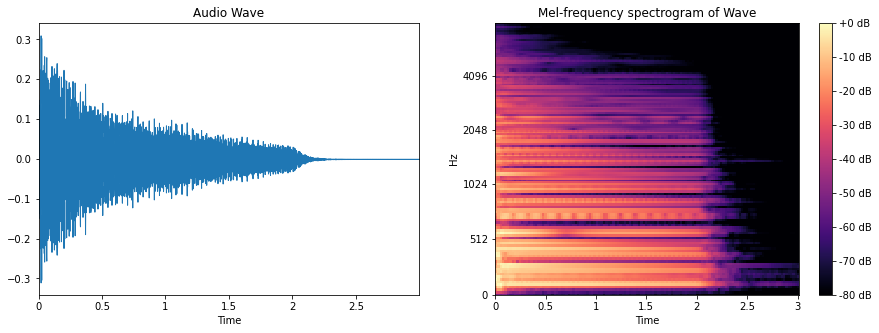

In [4]:
# Plot the waveform and a Mel Freq spectrogram
filename = "G_maj_3_1"
y, sr = librosa.load("/Users/atadros/Downloads/CSc447_Machine learning/Final Project/dataset/piano_triads/" + filename + ".wav")
y_harm, y_perc = librosa.effects.hpss(wav_data)

fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,5))
librosa.display.waveplot(y, sr=sr, ax=ax[0])

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
mel = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax[1])
fig.colorbar(mel, ax=ax[1], format='%+2.0f dB')

ax[0].set(title='Audio Wave');
ax[1].set(title='Mel-frequency spectrogram of Wave');